# Predicting Housing Prices with Regularized Regression

You work for a real estate analytics firm, and your task is to build a predictive model to estimate house prices based on various features. You have a dataset containing information about houses, such as square footage, number of bedrooms, number of bathrooms, and other relevant attributes. In this case study, you'll explore the application of Lasso and Ridge regression to improve the predictive performance of the model:

1. Data Preparation:

a. Load the dataset using pandas.

b. Explore and clean the data. Handle missing values and outliers.

c. Split the dataset into training and testing sets.

2. Implement Lasso Regression:

a. Choose a set of features (independent variables, X) and house prices as the dependent variable (y).

b. Implement Lasso regression using scikit-learn to predict house prices based on the selected features.

c. Discuss the impact of L1 regularization on feature selection and coefficients.

3. Evaluate the Lasso Regression Model:

a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Lasso regression model.

b. Discuss how the Lasso model helps prevent overfitting and reduces the impact of irrelevant features.

4. Implement Ridge Regression:

a. Select the same set of features as independent variables (X) and house prices as the dependent

variable (y) b. Implement Ridge regression using scikit-learn to predict house prices based on the selected

. Explain how 12 regularization in Ridge regression differs from L1 regularization in Lasso

5. Evaluate the Ridge Regression Model:

a. Calculate the MAE, MSE, and RMSE for the Ridge regression model.

b. Discuss the benefits of Ridge regression in handling multicollinearity among features and its Impact on the model's coefficients.

6. Model Comparison:

a. Compare the results of the Lasso and Ridge regression models.

b. Discuss when it is preferable to use Lasso, Ridge, or plain linear regression.

7. Hyperparameter Tuning:

a. Explore hyperparameter tuning for Lasso and Ridge, such as the strength of regularization, and discuss how different hyperparameters affect the models.

8. Model Improvement:

a. Investigate any feature engineering or data preprocessing techniques that can enhance the performance of the regularized regression models.

9. Conclusion:

a. Summarize the findings and provide insights into how Lasso and Ridge regression can be valuable tools for estimating house prices and handling complex datasets.

10. Presentation:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations, particularly focusing on the advantages and limitations of using regularized regression techniques in real estate prediction.

In this case study, you are required to demonstrate your ability to preprocess data, implement Lasso and Ridge regression models, evaluate their performance, and make recommendations for improving the models. This case study should assess your knowledge of regularized regression techniques and how to select and tune hyperparameters for these models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load the dataset
data=pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
x=data.iloc[:,1:4]
x.head()


,area,bedrooms,bathrooms
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1


In [9]:
y=data.iloc[:,:1]
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
data.shape

(545, 13)

In [19]:
#Lasso Regression
from sklearn.linear_model import Lasso
print("*******ridge Regression*******")
ll=Lasso(alpha=0.01)

print()
print("Training Started....\n")
ll.fit(xtrain,ytrain)
print()
ll_pred=ll.predict(xtest)
print("predicted values",ll_pred)
print("Lasso Train_score:\t",ll.score(xtrain,ytrain))
print()
print("Lasso Test Score: \t",ll.score(xtest,ytest))
print()
print('Lasso R-Square: \t',r2_score(ytest,ll_pred))

*******ridge Regression*******

Training Started....


predicted values [ 3459604.99283613  3776855.66690993  3448367.15653725  3327310.97827225
  4753653.79497924  4875995.18986932  4210988.16827407  3605707.27694906
  3137378.00892543  5306337.86402358  4462734.44337845  3659973.83961958
  4241493.84172173  4195575.98100052  4711910.28523269  6777312.64697153
  6311070.55443522  3686305.16209259  3268870.06462707  3810250.47470717
  5118491.39230892  4411740.86096712  4925186.0308497   6144096.51544902
  3022583.35712242  3422035.83406424  3494285.01725845  3877040.09030165
  7610579.60203324  3240451.56666674  3400779.55542618  3370691.31707598
  3409512.78114027  6190915.7468857   3959241.89316968  7304566.08640316
  3376117.97334303  6811992.67139385  5538431.77821441  4326200.25517455
  6991105.91739441  4044014.12928786  3260521.36267776  5666935.28771325
  3710066.05131544  3697542.99839148  3137378.00892543  3623689.89747276
  4094106.34098372  4902645.21344175 10518298.812081

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print("Mean Absolute Error: \t",mean_absolute_error(ytest,ll_pred))
print()
print("Mean Squared Error: \t",mean_squared_error(ytest,ll_pred))
print()
print("RMSE: \t",np.sqrt(mean_squared_error(ytest,ll_pred)))
print()
print("Variance Score: \t",explained_variance_score(ytest,ll_pred))
print()

Mean Absolute Error: 	 994005.105138263

Mean Squared Error: 	 1944775119085.4255

RMSE: 	 1394551.942053585

Variance Score: 	 0.45655655763613767



In [20]:
from sklearn.linear_model import LinearRegression
base_reg=LinearRegression()
print("*******Base Regression*******")
print()
print("Training Started....\n")
base_reg.fit(xtrain,ytrain)
print()
base_pred=base_reg.predict(xtest)

from sklearn.metrics import r2_score
print("Base Train_score:\t",base_reg.score(xtrain,ytrain))
print()
print("Base Test Score: \t",base_reg.score(xtest,ytest))
print()
print('R-Square: \t',r2_score(ytest,ll_pred))

*******Base Regression*******

Training Started....


Base Train_score:	 0.4925554627751194

Base Test Score: 	 0.4520332859201651

R-Square: 	 0.45203328612005356


In [15]:
from sklearn.linear_model import Ridge
print("*******ridge Regression*******")
rr=Ridge(alpha=0.01)

print()
print("Training Started....\n")
rr.fit(xtrain,ytrain)
print()
rr_pred=rr.predict(xtest)
print("predicted values",rr_pred)
print("Ridge Train_score:\t",rr.score(xtrain,ytrain))
print()
print("Ridge Test Score: \t",rr.score(xtest,ytest))
print()
print('Ridge R-Square: \t',r2_score(ytest,rr_pred))

*******ridge Regression*******

Training Started....


predicted values [[ 3459636.70369918]
 [ 3776890.60449623]
 [ 3448390.08458515]
 [ 3327332.67507048]
 [ 4753698.66747661]
 [ 4876032.63817185]
 [ 4211027.5213764 ]
 [ 3605740.47380309]
 [ 3137397.77393541]
 [ 5306388.35781252]
 [ 4462767.68844939]
 [ 3660007.58841311]
 [ 4241524.83657776]
 [ 4195606.50883082]
 [ 4711954.73316121]
 [ 6777231.60436436]
 [ 6310976.10121245]
 [ 3686330.51018293]
 [ 3268891.16702892]
 [ 3810285.75194855]
 [ 5118376.14097257]
 [ 4411627.08986172]
 [ 4925077.48194115]
 [ 6144000.36395085]
 [ 3022601.95456806]
 [ 3422067.16281532]
 [ 3494308.41233209]
 [ 3877076.04685319]
 [ 7610653.53202264]
 [ 3240481.04854333]
 [ 3400801.99946559]
 [ 3370722.12360738]
 [ 3409543.9825207 ]
 [ 6190966.56910698]
 [ 3959287.35430341]
 [ 7304481.73791899]
 [ 3376148.83506838]
 [ 6811903.31299726]
 [ 5538484.63260615]
 [ 4326240.78008691]
 [ 6991173.5467821 ]
 [ 4044051.7841148 ]
 [ 3260542.38016584]
 [ 5666842.9515747 ]
 [ 3

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print("Mean Absolute Error: \t",mean_absolute_error(ytest,rr_pred))
print()
print("Mean Squared Error: \t",mean_squared_error(ytest,rr_pred))
print()
print("RMSE: \t",np.sqrt(mean_squared_error(ytest,rr_pred)))
print()
print("Variance Score: \t",explained_variance_score(ytest,rr_pred))
print()
#print("R-Square: \t",r2_score(ytest,ypred))

Mean Absolute Error: 	 994000.534263318

Mean Squared Error: 	 1944771932268.1426

RMSE: 	 1394550.7994577116

Variance Score: 	 0.4565574444815155



# Diagnosing and Remedying Heteroscedasticity and Multicollinearity

You are working as a data analyst for a company that aims to predict employee performance based on

various factors such as experience, education level, and the number of projects completed. You've built a linear regression model, but you suspect it may be suffering from issues related to heteroscedasticity and multicollinearity. Your task is to diagnose and address these problems:

1. Initial Linear Regression Model:

a. Describe the dataset and the variables you're using for predicting employee performance.

b. Implement a simple linear regression model to predict employee performance.

c. Discuss why linear regression is a suitable choice for this prediction problem.

2. Identifying Heteroscedasticity:

a. Explain what heteroscedasticity is in the context of linear regression.

b. Provide methods for diagnosing heteroscedasticity in a regression model.

c. Apply these diagnostic methods to your model's residuals and report your findings.

3. Remedying Heteroscedasticity:

a. Discuss the potential consequences of heteroscedasticity on your regression model.

b. Suggest ways to address heteroscedasticity, such as transforming variables or using weighted least squares regression.

c. Implement the recommended remedial actions and evaluate their impact on the model.

4. Detecting Multicollinearity:

a. Explain what multicollinearity is and how it can affect a linear regression model.

b. Use correlation matrices or variance inflation factors (VIFS) to identify multicollinearity in your predictor variables.

c. Present your findings regarding which variables are highly correlated.

5. Mitigating Multicollinearity:

a. Discuss the potential issues associated with multicollinearity and its impact on model interpretability.

b. Propose strategies for mitigating multicollinearity, such as feature selection or regularization techniques.

c. Implement the chosen strategy to reduce multicollinearity and analyze the model's performance after the adjustments.

6. Model Evaluation:

a. Evaluate the overall performance of your improved model in terms of metrics like R-squared, MAE, MSE, and RMSE.

b. Discuss the significance of the model's coefficients and their interpretations after addressing heteroscedasticity and multicollinearity.

7. Conclusion:

a Summarize the impact of identifying and addreccing heteroscedacticity and multicollinearityon the predictive accuracy and interpretability of your employee performance model.

b. Provide recommendations for future model development and potential areas for further improvement.

In this case study, you are expected to demonstrate your knowledge of linear regression, the ability to diagnose and address heteroscedasticity and multicollinearity issues, and how these actions can enhance the quality of a predictive model. This case study should assess your expertise in applying statistical techniques and data analysis in real-world scenarios.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Load the dataset
data=pd.read_csv("employee.csv")
data

,price,salary,no.of projects,experience,Education,Unnamed: 5,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,stories
0,13300000,7420,4,2,Bachelors,NaN,no,no,no,yes,2,yes,furnished,stories
1,12250000,8960,4,4,Bachelors,NaN,no,no,no,yes,3,no,furnished,stories
2,12250000,9960,3,2,Bachelors,NaN,no,yes,no,no,2,yes,semi-furnished,stories
3,12215000,7500,4,2,Masters,NaN,no,yes,no,yes,3,yes,furnished,stories
4,11410000,7420,4,1,Masters,NaN,yes,yes,no,yes,2,no,furnished,stories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,Bachelors,NaN,no,yes,no,no,2,no,unfurnished,stories
541,1767150,2400,3,1,Bachelors,NaN,no,no,no,no,0,no,semi-furnished,stories
542,1750000,3620,2,1,Masters,NaN,no,no,no,no,0,no,unfurnished,stories
543,1750000,2910,3,1,Bachelors,NaN,no,no,no,no,0,no,furnished,stories


In [11]:
data.isna().sum()

price                0
salary               0
no.of projects       0
experience           0
Education            0
Unnamed: 5         545
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
furnished            0
stories              0
dtype: int64

In [15]:
x=data.iloc[:,3:4]
x

,experience
0,2
1,4
2,2
3,2
4,1
...,...
540,1
541,1
542,1
543,1


In [18]:
y=data.iloc[:,1:2]
#y.head(2)
y

,salary
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910


In [19]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
data.shape

(545, 14)

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#train the data
print('Training Started.......\n')
print()
lin_reg.fit(xtrain, ytrain)
print()
print('Training Completed.....')
print()
#test the data

print('Testing invoked......\n')
ypred=lin_reg.predict(xtest)

print('Predicted Total Price \n',ypred)

print('\n Testing is also completed....\n')

Training Started.......



Training Completed.....

Testing invoked......

Predicted Total Price 
 [[4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [5576.77411616]
 [5576.77411616]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [5576.77411616]
 [5576.77411616]
 [5576.77411616]
 [5576.77411616]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [5576.77411616]
 [4940.19689865]
 [5576.77411616]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [5576.77411616]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [4940.19689865]
 [6849.92855118]
 [4940.19689865]
 [4940.19689865]


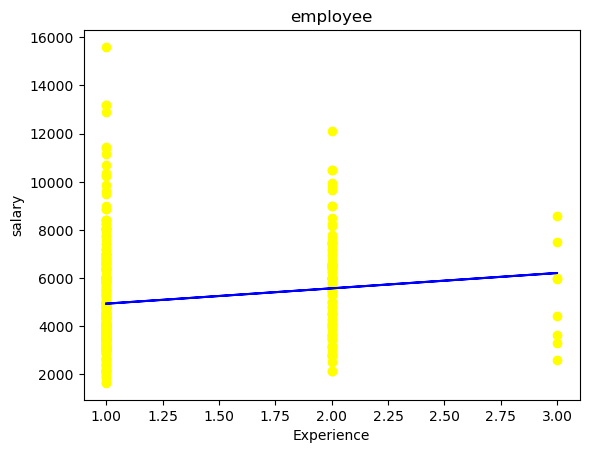

In [23]:
plt.scatter(xtrain,ytrain,color='yellow')
plt.plot(xtrain,lin_reg.predict(xtrain),color='blue')
plt.title("employee")
plt.xlabel("Experience")
plt.ylabel("salary")
plt.show()

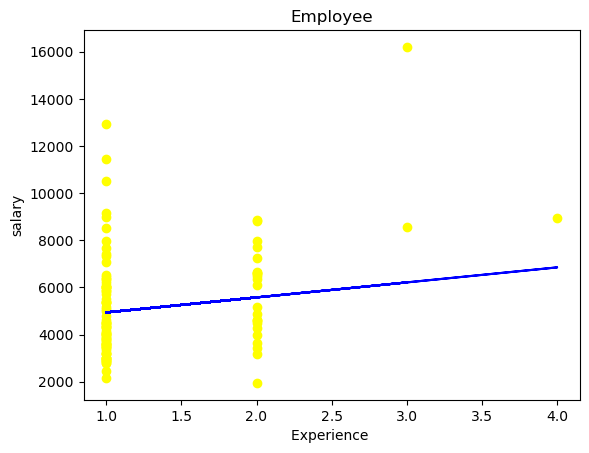

In [24]:
plt.scatter(xtest,ytest,color='yellow')
plt.plot(xtest,lin_reg.predict(xtest),color='blue')
plt.title("Employee")
plt.xlabel("Experience ")
plt.ylabel("salary")
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print("Mean Squared Error: \t",mean_squared_error(ytest,ypred))
print()
print("RMSE: \t",np.sqrt(mean_squared_error(ytest,ypred)))
print()
print("Variance Score: \t",explained_variance_score(ytest,ypred))
print()
print("R-Square: \t",r2_score(ytest,ypred))

Mean Squared Error: 	 4832914.663171456

RMSE: 	 2198.389106407566

Variance Score: 	 0.08404934809173437

R-Square: 	 0.0802843137560254
